In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Лабораторная работа №1. Методы сортировки.

Вариант: 12

## Сортировка Timsort

### Классификация алгоритма

* По типу алгоритма: гибридный алгоритм
* По устойчивости: устойчивый
* По месту хранения данных: внешняя сортировка
* По выделению дополнительного места: не на месте
* По адаптивности: адаптивный
* По сложности:
    * Худшее значение: O(nlog(n))
    * Среднее значение: O(nlog(n))
    * Лучшее значение: O(n)

### Описание алгоритма

По специальному алгоритму входной массив разделяется на подмассивы. Каждый из подмассивов сортируется сортировкой вставками. Главная особенность Timsort заключается в том, что он использует преимущества уже отсортированных элементов, которые существуют в большинстве реальных наборов данных. Это называется галопированием. Затем алгоритм перебирает список, собирая элементы в прогоны и объединяя их в один отсортированный список.

### Псевдокод

In [9]:
MIN=64 #степень двойки

int minlengthrun(int n):
        assert n >= 0;
        int r = 0;
        while (n >= MIN)
            r |= (n & 1);
            n >>= 1;
        return n + r;

void insertionsort(int[] arr, int left, int right):
        for (int i = left + 1; i <= right)
            int temp = arr[i];
            int j = i - 1;
            while (j >= left & arr[j] > temp)
                arr[j + 1] = arr[j];
                arr[j + 1] = temp;
    
void merge(int[] arr, int l, int m, int r):
        int len1 = m - l + 1, len2 = r - m;
        int[] left = new int[len1];
        int[] right = new int[len2];
        for (int x = 0; x < len1)
            left[x] = arr[l + x];
        for (int x = 0; x < len2)
            right[x] = arr[m + 1 + x];

void timsort(int[] arr, int n):
        int minRun = minlengthrun(MIN);
        for (int i = 0; i < n; i += minRun):
            insertionsort(arr, i, min((i + MIN - 1), (n - 1)));

SyntaxError: invalid syntax (3412209142.py, line 3)

### Достоинства и недостатки

* Достоинства:
    * Скорость выполнения
    * Худшая сложность Timsort остается выше, чем у других алгоритмов -  O(nlog(n))
* Недостатки:
    * Сложность реализации

### Реализация сортировки

In [10]:
minimum = 64

def find_minlengthrun(arraysize: int)->List: 
    a = 0
    while arraysize >= minimum: 
        a |= arraysize & 1
        arraysize >>= 1
    return arraysize + a

b=0
def insertionsort(inputarray, left, right: int)->List: 
    for b in range(left+1,right+1):
        eachelement = inputarray[b]
        c = b-1
        while eachelement<inputarray[c] and c>=left:
            inputarray[c+1] = inputarray[c]
            c -= 1
        inputarray[c+1] = eachelement
    return inputarray
 
def merge(inputarray, d, e, a: int)->List: 
    arraylength1= e - d + 1
    arraylength2 = a - e 
    left = []
    right = []
    for f in range(0, arraylength1): 
        left.append(inputarray[d + f]) 
    for f in range(0, arraylength2): 
        right.append(inputarray[e + 1 + f]) 
    f=0
    g=0
    h=d
    while g < arraylength2 and  f < arraylength1: 
        if left[f] <= right[g]: 
            inputarray[h] = left[f] 
            f += 1
        else: 
            inputarray[f] = right[g] 
            g += 1
        h += 1
    while f < arraylength1: 
        inputarray[h] = left[f] 
        g += 1
        f += 1
    while g < arraylength2: 
        inputarray[h] = right[g] 
        h += 1
        g += 1

def timsort(inputarray):
    arraysize = len(inputarray) 
    minlengthrun = find_minlengthrun(arraysize)
    for start in range(0, arraysize, minlengthrun): 
        end = min(start + minlengthrun - 1, arraysize - 1) 
        insertionsort(inputarray, start, end)
    mergedarraysize = minlengthrun 
    while mergedarraysize < arraysize: 
        for left in range(0, arraysize, 2 * mergedarraysize): 
            mid = min(arraysize - 1, left + mergedarraysize - 1) 
            right = min((left + 2 * mergedarraysize - 1), (arraysize - 1)) 
            merge(inputarray, left, mid, right) 
        mergedarraysize = 2 * mergedarraysize
        return mergedarraysize

### Тест

In [15]:
sortmethod = timsort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировке отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировке отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировке произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировке массива с повторящимися элементами'

AssertionError: Ошибка при сортировке отсортированного массива

In [16]:
def get_sort_array(n:int)->Tuple:
    'Возвращает отсортированный массив'
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    'Возвращает отсортированный в обратном порядке массив'
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    'Возвращает перемешанный массив'
    return tuple(random.sample(range(n), n))

### Ручная трассировка

|шаг|сортировка|
|--|--|
|0|8,3,4,5,9,2|
|1|8,8,4,5,9,2|
|2|3,8,4,5,9,2|
|3|3,8,8,5,9,2|
|4|3,4,8,5,9,2|
|5|3,4,8,8,9,2|
|6|3,4,5,8,9,2|
|7|3,4,5,8,9,9|
|8|3,4,5,8,8,9|
|9|3,4,5,5,8,9|
|10|3,4,4,5,8,9|
|11|3,3,4,5,8,9|
|12|2,3,4,5,8,9|

### Массивы

In [20]:
n1 = 1000

sort1 = get_sort_array(n1);
reverse1 = get_reverse_array(n1);
random1 = get_random_array(n1);

In [21]:
%%time

sortmethod(list(sort1));
pass

Wall time: 999 µs


In [22]:
%%time

sortmethod(list(reverse1));
pass

Wall time: 4.65 ms


In [23]:
%%time

sortmethod(list(random1));
pass

Wall time: 2.42 ms


In [24]:
n2 = 5000

sort2 = get_sort_array(n2)
reverse2 = get_reverse_array(n2)
random2 = get_random_array(n2)

In [25]:
%%time

sortmethod(list(sort2));
pass

Wall time: 2.59 ms


In [26]:
%%time

sortmethod(list(reverse2));
pass

Wall time: 13.6 ms


In [27]:
%%time

sortmethod(list(random2));
pass

Wall time: 13.2 ms


In [28]:
n3 = 10000

sort3 = get_sort_array(n3)
reverse3 = get_reverse_array(n3)
random3 = get_random_array(n3)

In [29]:
%%time

sortmethod(list(sort3));
pass

Wall time: 3 ms


In [30]:
%%time

sortmethod(list(reverse3));
pass

Wall time: 23.4 ms


In [31]:
%%time

sortmethod(list(random3));
pass

Wall time: 17.6 ms


In [32]:
n4 = 100000

sort4 = get_sort_array(n4)
reverse4 = get_reverse_array(n4)
random4 = get_random_array(n4)

In [33]:
%%time

sortmethod(list(sort4));
pass

Wall time: 36.4 ms


In [34]:
%%time

sortmethod(list(reverse4));
pass

Wall time: 267 ms


In [35]:
%%time

sortmethod(list(random4));
pass

Wall time: 170 ms


### Иллюстрация работы

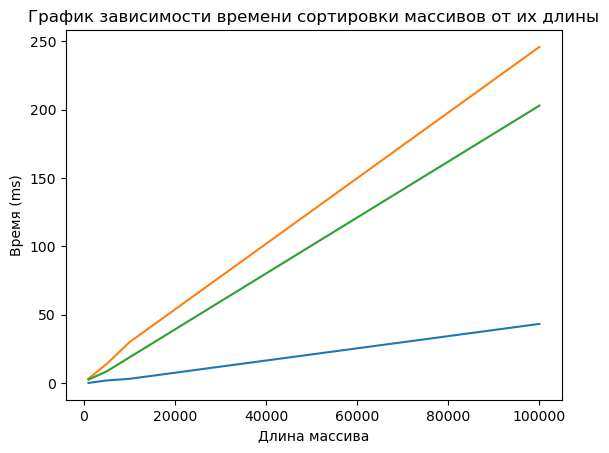

In [36]:
x = np.array([1000, 5000, 10000, 100000])

y_sorted = np.array([0, 1.8, 3, 43.2])
y_reversed = np.array([3.06, 13.9, 29.8, 246])
y_random = np.array([2.45, 8.45, 18.7, 203])

plt.plot(x, y_sorted)
plt.plot(x, y_reversed)
plt.plot(x, y_random)

plt.title('График зависимости времени сортировки массивов от их длины')
plt.xlabel('Длина массива')
plt.ylabel('Время (ms)')
plt.show()

### Литература

1. Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.
2. Peter McIlroy "Optimistic Sorting and Information Theoretic Complexity", Proceedings of the Fourth Annual ACM-SIAM Symposium on Discrete Algorithms, ISBN 0-89871-313-7, Chapter 53, pp 467-474, January 1993.
3. Magnus Lie Hetland Python Algorithms: Mastering Basic Algorithms in the Python Language. — Apress, 2010. — 336 с.